**Regrespresso**

See all Google colab shortcuts: CTRL + M + H

To see docstring or source code, apply the following:

housing.columns.tolist?

housing.columns.tolist??

or housing.columns.tolist(<press_shift_tab_here>)

This project requires Python 3.7 or above

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn >= 1.0.1

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

---

# Get the data

*Our task is to predict median house values in Californian districts, given #features from these districts.*

## Download the Data

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path="datasets")
  return pd.read_csv("datasets/housing/housing.csv")

housing = load_housing_data()

/tmp/ipython-input-738195945.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


## Take a Quick Look at the Data Structure

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

info() method is useful to get a quick description of the data.
in particular

• the total number of rows,

• each attribute's type

• the number of non-null values.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
len(housing)

20640

There are 20,640 instances in the dataset, which means that
it is fairly small by ML standards. However, it's perfect to get started.

Also, notice that `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We'll take care of this later.

All attributes are numerical, except for `ocean_proximity`.

It's dtype is `object`, so it could hold any kind of Python object. However, keep in mind that `str` dtype is shown as object in pandas.

You can find out what categories exist and how many districts belong to each category by using the `value_counts()` method.

In [8]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Also, `unique()` and `nunique()` methods are quite useful for EDA. Name of these methods are self-explanatory.

In [9]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
housing["ocean_proximity"].nunique()

5

---

`describe()` method shows a summary of the numerical attributes.

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The 25%, 50% and 75% rows show the corresponding *percentiles*.

A percentile indicates the value below which a given percentage of observations in a group observations fall.

e.g., 25% of the districts have a `housing_median_age` lower than 18, while 50% are lower than 29 and 75% are lower than 37.

Notice that 50% percentile corresponds to *median*.

---

*Histogram* is a representation of the distribution of data.

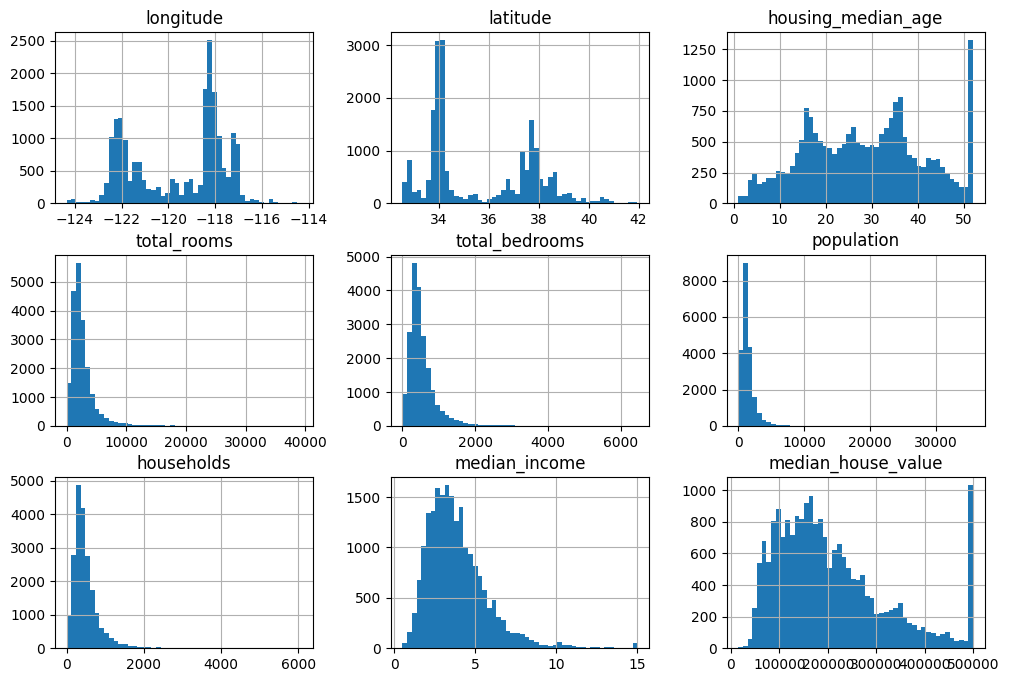

In [12]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

In [13]:
housing["median_income"].describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [14]:
housing["median_income"].unique()

array([8.3252, 8.3014, 7.2574, ..., 2.3598, 2.3661, 2.0943])

In [15]:
housing["median_income"].min()

0.4999

In [16]:
housing["median_income"].max()

15.0001

Notice that `median_income` attribute is not expressed in USD.

3 is actually corresponds to $30,000. (See page 55 for more details)

Also, this data has been scaled and capped at 15 (actually, 15001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes.

Note to myself: For better explanation on *data capping*, See [ChatGPT > Projects > CENG463 - Machine Learning > Hands-On ML Chapter 2 Q&A](https://chatgpt.com/g/g-p-68d9442b7b4081918e4e381d8821d00b-ceng463-machine-learning/c/68f4a136-fcdc-8329-b01a-e17222e47a2c).

---

In [17]:
housing["housing_median_age"].describe()

,housing_median_age
count,20640.000000
mean,28.639486
std,12.585558
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [18]:
housing["median_house_value"].describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


`housing_median_age` and `median_house_value` attributes are also capped (truncated).

Note that `median_house_value` is our target attribute (**y**).

Especially, capping the target value is dangerous.

More technically, y' = min(y, 500,000)

i.e., \$800k is capped down to \$500k, \$10k -> \$15k, etc.

In this case, the ML algorithms may learn that prices never go beyond that limit.

Ask the team that will use the system's output to see if this is a problem or not. If they tell you that they need precise predictions even beyond \$500k, then you have two options:

- Collect proper labels for districts whose labels were capped. (i.e., somehow obtain the real prices of those houses)

- Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond \$500k.)

This is problematic because if you don't deal with this, your model will "believe" that house prices never go beyond \$500k. So if you give it features of a very expensive neighborhood, it will still predict something close to \$500k because that's all it has seen.

This creates a **biased model**, since it cannot generalize beyond that artificial limit.


Also, attributes have very different scales. (Feature Scaling is needed, if you use Gradient Descent for training, otherwise the algorithm works slower).

The book says that many histograms are *skewed right* -> COULDN'T UNDERSTAND IT, I'M GONNA ASK IT TO CHATGPT

---

# Create a Test Set

Best practice: Create test set before any analysis.

At first, it may feel strange to hide part of your dataset right away. You might think "I barely looked at the data yet, shouldn't I analyze it first and then decide what to do?"

Human brain is prone to overfitting. If you keep looking at **all** of your data while testing different models, you will start noticing small patterns that happen by chance (which are not-generalizable patterns). So, if you adapt your choices to those random, accidental patterns (noises), you are effectively overfitting to your dataset (not in technical way, but due to the way of how human brain works).

When you later evaluate your model on the same data you used during exploration or model tuning, the results will look too good to be true. Because you've already peeked at how the data distributes and made choices that fit it perfectly. However, when you deploy the model in the real world (with new unseen data), performance drops. This false optimism is called *data snooping bias* (or *data leakage* in other contexts). (see https://en.wikipedia.org/wiki/Leakage_(machine_learning)

To avoid this,

- Immediately set aside part of your data as a test set. (typically, 20%)
- Never touch it until the very end. Not for exploration, visualization or feature selection. Because the test set **MUST** represent the unseen data, as if it came from the real world in the future. If you are the one who is making choices to improve your ML model's success (generalization). You may start making modeling decisions based on information that you shouldn't know yet. This problem is known as *data leakage* (or *data snooping* bias).
- Use the remaining 80% as your training data, and within that you can still split a validation set or use cross-validation later.

tldr: After once you have taken a quick glance at the data, you must set aside a test set early to protect yourself from your own cleverness, because even unconsciously, you might overfit yout entire project to the data you've already seen.


Creating a test set is simple in theory:

- Pick some instances randomly (20% in general)

However, if the dataset is gigantic, you may create with less percentage.

In [19]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  m = len(data) # num of rows in df
  shuffled_indices = np.random.permutation(m)
  test_set_size = int(m * test_ratio)
  test_indices = shuffled_indices[:test_set_size] # pick the indices in range [0, test_set_size)
  train_indices = shuffled_indices[test_set_size:] # range: [test_set_size, m)
  train_set = data.iloc[train_indices]
  test_set = data.iloc[test_indices]
  return train_set, test_set # return as 2-tuple

In [20]:
train_set, test_set = shuffle_and_split_data(data=housing, test_ratio=0.2)

In [21]:
len(train_set)

16512

In [22]:
len(test_set)

4128

However, notice that if you use `shuffle_and_split_data()` and run the program again, it will generate a different test set! Over time, you (or your ML algorithms) will get to see the whole dataset, which is you want to avoid.

Possible Solutions to that:
- Save the test set and then load it in subsequent runs
- Set the random number generator's seed, via `np.random.seed()`


Normally, for train and test split, Scikit-Learn comes with `train_test_split`.

e.g.,

`from sklearn.model_selection import train_test_split`

`train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)`

`train_test_split` works fine **if your dataset does not change**.

But how can you guarantee that your dataset won't change? Is there a way to have a stable train/test split after the dataset is updated?

For example:
Suppose you download an updated version of the dataset next month. Some new rows are added, or a few are deleted. If you shuffle and split again, the random permutation changes. Therefore, the test set changes.

It means that some rows that were previously in the training set might now end up in the test set. It causes *data leakage*, because your model has already seen them.

tldr: You want the **same rows to always belong to the same set**, even if the dataset is updated later. We can achieve this with *hash*.

But how?

Recall that hash functions define a **deterministic** rule that given an input, it is guaranteed to map it to the same slot. Specifically, for a given data instance, it can always decide whether it belongs to the test set or the training set (even if the dataset is updated, reloaded or reshuffled, etc.)

Hash functions take an *identifier* (like id, or index) and return a fixed-size integer that looks random, but is always the same for the same input.

e.g.,

crc32("district_001") -> 276543213

crc32("district_002") -> 987653210

Due to the deterministic nature of the hash functions, you will get the same output if you run this tomorrow, next week, or on another computer.



In [23]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  '''
  Compute the hash of identifier, and put the relevant instance
  in the test set if the hash is <= 20% of the maximum hash value.
  '''
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set] # return as 2 tuple (train_set, test_set)

In [24]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Notice that housing dataset doesn't contain an identifier column.

In [25]:
housing_with_id = housing.reset_index() # adds an 'index' column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
train_set, test_set = split_data_with_id_hash(data=housing_with_id, test_ratio=0.2, id_column="index")

If you use the row index as unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique id.

In [27]:
# combine stable features to form a unique id
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

*(ref: Hands-On ML)*

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways.

e.g., the simplest one is `train_test_split()`. It does the same thing as the `shuffle_and_split_data()` function we defined earlier, with a couple of additional features:

- First, there is a `random_state` parameter that allows you to set the random generator seed.
- Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices. This is very useful, for example, if you have a separate DataFrame for labels.

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Stratified Sampling
https://en.wikipedia.org/wiki/Stratified_sampling

Suppose the domain experts told that the median income is a crucial feature to predict median housing prices. You want to be sure that the test set is representative of the various categories of incomes in the dataset.

However, since the median income is continuous numerical attribute, it's better to create an income category attribute.

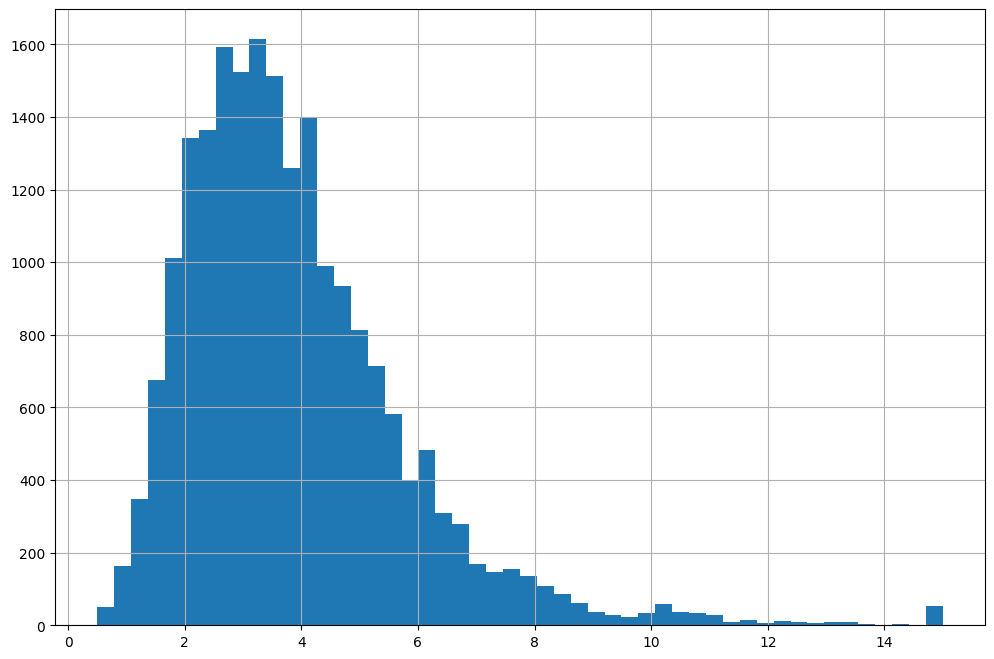

In [29]:
housing["median_income"].hist(bins=50, figsize=(12,8))
plt.show()

In [30]:
housing["median_income"].describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [31]:
housing["median_income"].value_counts().to_dict()

{15.0001: 49,
 3.125: 49,
 2.875: 46,
 4.125: 44,
 2.625: 44,
 3.875: 41,
 3.375: 38,
 3.0: 38,
 4.0: 37,
 3.625: 37,
 4.375: 35,
 2.125: 33,
 2.375: 32,
 4.625: 31,
 3.5: 30,
 4.875: 29,
 2.25: 29,
 3.75: 29,
 1.625: 29,
 3.25: 29,
 2.5: 28,
 4.25: 28,
 3.6875: 26,
 2.75: 25,
 4.5: 24,
 1.875: 21,
 2.5625: 21,
 5.0: 20,
 3.0625: 19,
 3.3125: 18,
 2.0: 18,
 4.4375: 18,
 5.5: 18,
 3.5625: 17,
 3.0833: 17,
 2.3333: 16,
 2.4375: 16,
 4.0625: 16,
 3.3438: 16,
 3.8125: 16,
 1.75: 15,
 4.0417: 15,
 3.1667: 15,
 2.4167: 15,
 3.2813: 14,
 2.8125: 14,
 3.5313: 14,
 2.1875: 14,
 2.5833: 14,
 4.5625: 14,
 3.6667: 14,
 3.9375: 14,
 3.4375: 13,
 2.3125: 13,
 2.7083: 13,
 3.7813: 13,
 1.9375: 13,
 4.5833: 13,
 2.3: 13,
 2.6667: 13,
 2.9821: 12,
 4.2917: 12,
 2.5417: 12,
 4.75: 12,
 3.1875: 12,
 0.4999: 12,
 3.6: 12,
 2.7813: 11,
 4.0833: 11,
 7.5: 11,
 6.0: 11,
 3.7917: 11,
 4.8125: 11,
 1.125: 11,
 3.2917: 11,
 1.6875: 11,
 3.3333: 11,
 3.9464: 11,
 3.0417: 11,
 3.3906: 11,
 4.0313: 11,
 2.9375: 11

In [32]:
filtered_data = housing[(housing["median_income"] >= 1.5) & (housing["median_income"] <= 6)]

num_filtered_samples = len(filtered_data)

percentage_filtered_samples = num_filtered_samples / len(housing) * 100

percentage_filtered_samples

84.60755813953489

Based on these observations, most of the median income values are populated around 1.5 to 6 (i.e., $15k - $60k). However, some median incomes go far beyond 6. It's crucial to have enough #instances in your dataset for each stratum. Otherwise, it'll be biased.


In [33]:
# Create categorical column, namely income_cat

# pandas.cut(): https://pandas.pydata.org/docs/reference/api/pandas.cut.html

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

In [34]:
housing["income_cat"]

,income_cat
0,5
1,5
2,5
3,4
4,3
...,...
20635,2
20636,2
20637,2
20638,2


In [35]:
housing["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


In [36]:
housing["income_cat"].value_counts().sort_index()

,count
income_cat,
1,822
2,6581
3,7236
4,3639
5,2362


<Axes: xlabel='income_cat'>

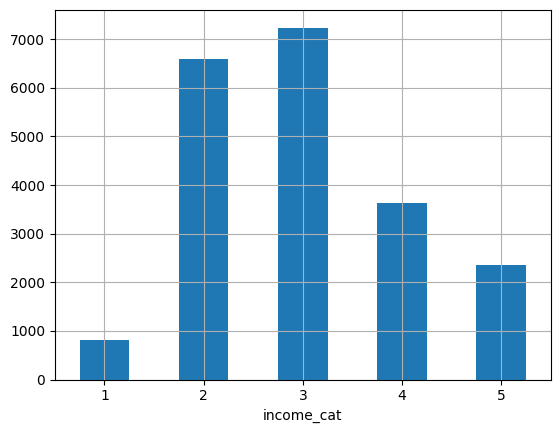

In [37]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

Scikit-Learn provides a number of splitter classes in the `sklearn.model_selection` package that implement various strategies to split your dataset into a training & test set. Each splitter has `split()` function that returns an iterator over different training/test splits of the same data. Particularly, `split()` returns the training and test *indices*, not the data itself.

In [38]:
# Create 10 different stratified splits of housing dataset
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set = housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]
  strat_splits.append([strat_train_set, strat_test_set])

In [39]:
len(strat_splits)

10

In [40]:
len(strat_splits[0])

2

In [41]:
len(strat_splits[0][0]) # 80%

16512

In [42]:
# Get a single split using train_test_split() with stratify argument
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [43]:
strat_test_set["income_cat"]

,income_cat
3905,5
16821,4
2900,3
7193,3
13928,3
...,...
12369,2
8707,2
16634,4
9779,4


In [44]:
strat_test_set["income_cat"].value_counts()

,count
income_cat,
3,1447
2,1316
4,728
5,472
1,165


In [45]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [46]:
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


Stratified Sampling seems worked as expected!
See the Figure 2-10. in textbook for Sampling bias comparison of stratified versus purely random sampling

`income_cat` column is only used for "stratification". It won't be longer needed, so I drop this column.

In [47]:
# strat_train_set = strat_train_set.drop("income_cat", axis=1)
# strat_test_set = strat_test_set.drop("income_cat", axis=1)

In [48]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

Note that many of these ideas for test set generation will be useful for cross-validation.